# Linear Regression from Scratch

We are going to implement linear regression from scratch using ordinary least square mean method.

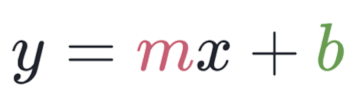

In [1]:
# Import libraries
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

### Prepare data

In [2]:
dataset = pd.read_csv('data/dataset.csv')

In [3]:
print(dataset.shape)

(237, 4)


In [4]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
column_names = {
    'Gender': 'gender',
    'Age Range': 'age_range',
    'Head Size(cm^3)': 'head_size',
    'Brain Weight(grams)': 'brain_weight',
}

In [6]:
dataset.rename(columns = column_names, inplace=True)

In [7]:
# Define inputs and outputs
x = dataset.head_size.to_numpy()
y = dataset.brain_weight.to_numpy()

### Relationship between head_size and brain_weight

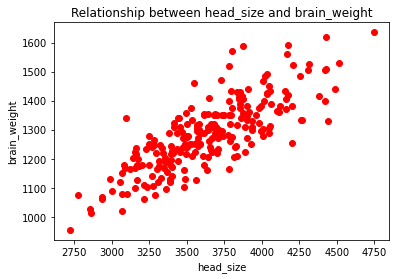

In [8]:
plt.scatter(x, y, color='red')
plt.title('Relationship between head_size and brain_weight')
plt.xlabel('head_size')
plt.ylabel('brain_weight')

plt.show()

### Prepare data

### Implement Ordinary Least Square Method

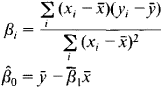

In [9]:
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept = None
        self.score = None
    
    def fit(self, x, y):
        # Implement Ordinary Least Square
        
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        # b1 = coeficient or scale factor (aka m)
        b1 = np.sum((x - x_mean)  * (y - y_mean)) / np.sum(np.power((x - x_mean), 2))     
        # b0 = bias coeficient (aka b)
        b0 = y_mean - b1 * x_mean
        
        self.coef_ = b1
        self.intercept = b0
        
    def predict(self, x):
        return self.coef_ * x + self.intercept

### Plot results

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(x, y)

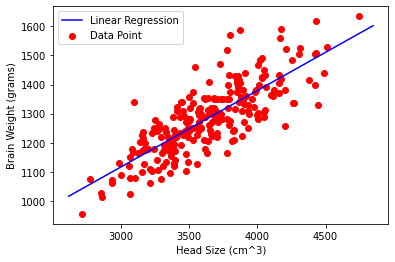

In [11]:
#plotting values 
x_max = np.max(x) + 100
x_min = np.min(x) - 100
x_plot = np.linspace(x_min, x_max, 1000)

# Make prediction
y_hat = linear_regression.predict(x_plot)

#plotting line 
plt.plot(x_plot, y_hat, color='blue', label='Linear Regression')

#plot the data point
plt.scatter(x, y, color='red', label='Data Point')

# x-axis label
plt.xlabel('Head Size (cm^3)')

#y-axis label
plt.ylabel('Brain Weight (grams)')

plt.legend()
plt.show()

## Evaluate model

### RMSE

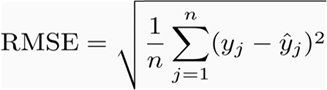

In [12]:
y_predicted = linear_regression.predict(x)

In [13]:
def rmse(y, y_predicted):
    return np.power(np.sum(np.power((y - y_predicted), 2)) / len(y), 1/2) 

In [14]:
rmse(y, y_predicted)

72.1206213783709

In [15]:
np.mean(y)

1282.873417721519

### R2

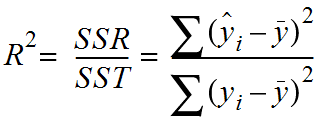

R² Score usually ranges from 0 to 1. It will also become negative if the model is completely wrong. 

In [16]:
def r2(y, y_predicted):
    y_mean = np.mean(y)
    return np.sum(np.power((y_predicted - y_mean), 2)) / np.sum(np.power((y - y_mean), 2))

In [17]:
r2(y, y_predicted)

0.639311719957

### Inspired the following post:
- [Post](https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72)